# Welcome to our third exercise! 

Today we will implement stochastic gradient descent, together with a dataloader class.

<h3>Task: Check Code</h3> 
Check the code inside the <code>exercise_3/code/boiler_plate/dataset.py</code> file.


The `Dataset` base class is responsible for downloading and extracting the dataset. 

It also requires us to define four methods:

- `__getitem__(self, index)`: This method should return the data and its label for a given index. This method will be mostly used in other methods.
  
- `__len__(self)`: This method should return the total number of items in the dataset.


If you're not familiar with iterators, you can learn more about them in this [article](https://www.programiz.com/python-programming/iterator).

- `__iter__(self)` and `__next__(self)`: These methods will be used to loop through the dataset.


<h3>Task: Check Code</h3> 
Check the code inside the <code>exercise_3/code/mnist_dataset.py</code> file.


"The MNIST dataset is a large database of handwritten digits that is commonly used for training and testing in the field of machine learning. It contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image of a handwritten digit between 0 and 9. The dataset also includes labels for each image, indicating the digit it represents."

The <b>MNISTDataset</b> loads this dataset.

The most critical parameter is the <b>load_to_memory</b> parameter. If load_to_memory is true, the whole dataset will be stored in two numpy arrays (images, labels), meaning the program will load it into <b>RAM</b>.

<b>If the dataset is large, this will not work.</b>

If <b>load_to_memory</b> is false, you can see in the getitem method that we will just load a single image from the folder into RAM, and the rest will stay on the disk.

The good news is that we only have to adapt the getitem and len methods. 

In [1]:
from code.mnist_dataset import MNISTDataset
import gc
from pympler import asizeof

root = 'data'
dataset_with_memory = MNISTDataset(root, load_to_memory=True,download=False)
dataset_without_memory = MNISTDataset(root, load_to_memory=False)

size_with_memory = asizeof.asizeof(dataset_with_memory)
size_without_memory = asizeof.asizeof(dataset_without_memory)

print(f"Size with memory:    {size_with_memory} bytes")
print(f"Size without memory:  {size_without_memory} bytes")

# Delete the loaded dataset
del dataset_with_memory
gc.collect()

print("dataset_with_memory deleted")

# Rename the dataset, so we don't have to type to much.
dataset = dataset_without_memory

Size with memory:    49921368 bytes
Size without memory:  2400928 bytes
dataset_with_memory deleted


In [2]:
image, label = dataset[1]
print(f"Label:{label}")
print(f"Shape: {image.shape}")
image

Label:0
Shape: (28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86,  85,
        255, 253, 198,  85,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 253, 251,
        253, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

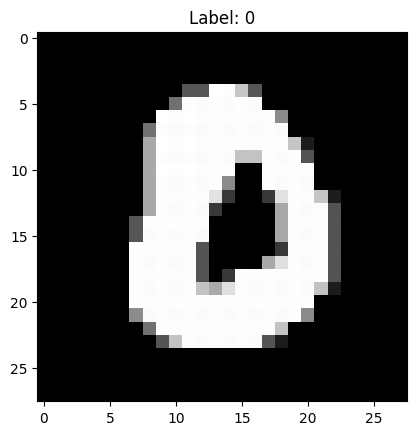

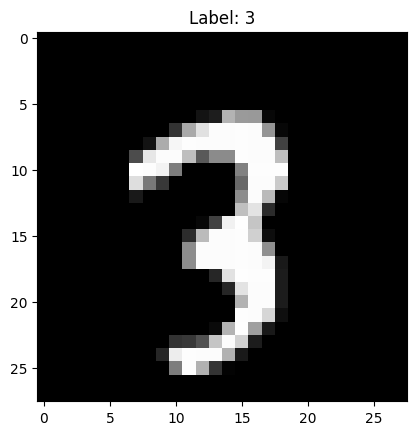

In [3]:
dataset.show_image(1)
dataset.show_image(2)

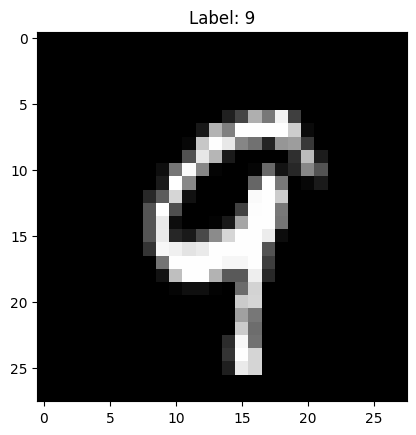

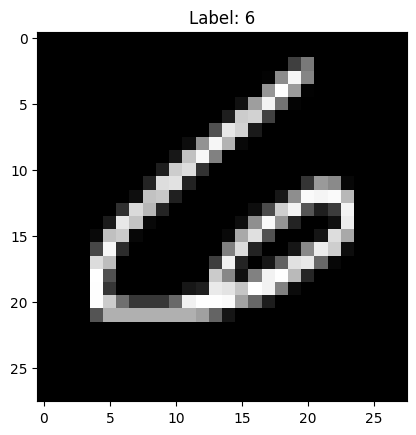

In [4]:
dataset.shuffle()
dataset.show_image(1)
dataset.show_image(2)

In [5]:
image_count = 0
for _image,_label in dataset:
    image_count+=1
    if image_count % 10000 == 0:
        print(f"Iterated over {image_count} images out of {len(dataset)}!")
print(image_count)

Iterated over 10000 images out of 60000!
Iterated over 20000 images out of 60000!
Iterated over 30000 images out of 60000!
Iterated over 40000 images out of 60000!
Iterated over 50000 images out of 60000!
Iterated over 60000 images out of 60000!
60000


### What is a Batch?

In deep learning, a batch is a subset of the dataset used to train a neural network. For example, if your dataset has 1000 samples (images, text, etc.), and you choose a batch size of 10, each batch will contain 10 samples. In this case, it would take 100 batches (1000 samples / 10 samples per batch) to complete one epoch, which is one pass through the entire dataset.

### Why Do We Use Batches?

1. **Computational Efficiency:** Loading the full dataset would take too much RAM.

2. **Enables the use of Stochastic Gradient Descent (SGD):**

<h3>Task: Implement.</h3> 
Go into <code>exercise_3/code/mnist_batch_dataset.py</code> and implement the __getitem__ and __len__ methods of the MNISTDatasetBatch class.


In [1]:
from tests.test import MNISTDatasetBatchTest_GetItem,MNISTDatasetBatchTest_Len,test_case_runner

test_classes = [MNISTDatasetBatchTest_GetItem,MNISTDatasetBatchTest_Len]
test_case_runner(test_classes)

TypeError: MNISTDataset.__init__() missing 1 required positional argument: 'root'

In [ ]:
from code.mnist_batch_dataset import MNISTDatasetBatch
root = "data"
batch_dataset = MNISTDatasetBatch(batch_size=4, root=root, load_to_memory=False,download=False)

In [ ]:
import matplotlib.pyplot as plt
batch1_images,batch1_labels = batch_dataset[0]

print(f"Shape of the images: {batch1_images.shape}")
print(f"Shape of the labels: {batch1_labels.shape}")
print(batch1_labels)

for image,label in zip(batch1_images, batch1_labels):
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.show()


In [13]:
# Implementing Stochastic Gradient Descent (SGD)
for images, labels in batch_dataset:
    # Initialize gradients
    gradients = None
    # Compute gradients for each instance in the batch
    for image, label in zip(images, labels):
        # Incrementally update the gradients with the gradient of the current instance
    # Average the gradients over the batch
    
    # Perform the update step with the averaged gradients

Iterated over 1000 batches out of 15000!
Iterated over 2000 batches out of 15000!
Iterated over 3000 batches out of 15000!
Iterated over 4000 batches out of 15000!
Iterated over 5000 batches out of 15000!
Iterated over 6000 batches out of 15000!
Iterated over 7000 batches out of 15000!
Iterated over 8000 batches out of 15000!
Iterated over 9000 batches out of 15000!
Iterated over 10000 batches out of 15000!
Iterated over 11000 batches out of 15000!
Iterated over 12000 batches out of 15000!
Iterated over 13000 batches out of 15000!
Iterated over 14000 batches out of 15000!
Iterated over 15000 batches out of 15000!
